### Video
a)	An AI winter is a period of reduced funding and interest in artificial intelligence research. There was a lot of hype around AI from the 1960s to the 1980s. It didn’t pan out 20 years ago. He does not believe it will repeat because if you bring the data science to data, you can have transformative impacts within these companies.

b)	The data scientist and the business user sitting together on the data side has presented some results and then the business user makes some decision about what to do based on that. More and more data science right now is focused on a prediction but increasingly it’s going to be focused on actual planning and optimal decision making.

c)	Yes. Because if companies want to compete with their competitors, they need a data scientist to bring in data science and build out data science practice.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/chenx16/Desktop/MA384/Data/ChicagoCrime/ChicagoCrime2017-12-08.csv')
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,...,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,...,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"


In [4]:
#a
df.shape
#(records, attributes)

(6491260, 22)

In [5]:
#b
(df.shape[0]- df.dropna().shape[0])/df.shape[0]

0.10725359945526755

In [6]:
#c
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491260 entries, 0 to 6491259
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [7]:
for i,col in enumerate(df.columns):
    print(i,col)

0 ID
1 Case Number
2 Date
3 Block
4 IUCR
5 Primary Type
6 Description
7 Location Description
8 Arrest
9 Domestic
10 Beat
11 District
12 Ward
13 Community Area
14 FBI Code
15 X Coordinate
16 Y Coordinate
17 Year
18 Updated On
19 Latitude
20 Longitude
21 Location


In [8]:
for i in [3,4,5,6,7,10,11,12,13,14,17,21]:
    col = df.columns[i]
    print(i,col)
    df[col] = df[col].astype('category')

3 Block
4 IUCR
5 Primary Type
6 Description
7 Location Description
10 Beat
11 District
12 Ward
13 Community Area
14 FBI Code
17 Year
21 Location


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491260 entries, 0 to 6491259
Data columns (total 22 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    int64   
 1   Case Number           object  
 2   Date                  object  
 3   Block                 category
 4   IUCR                  category
 5   Primary Type          category
 6   Description           category
 7   Location Description  category
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  category
 11  District              category
 12  Ward                  category
 13  Community Area        category
 14  FBI Code              category
 15  X Coordinate          float64 
 16  Y Coordinate          float64 
 17  Year                  category
 18  Updated On            object  
 19  Latitude              float64 
 20  Longitude             float64 
 21  Location              category
dtypes: bool(2), catego

In [10]:
(1002.9 - 594.3)/1002.9

0.4074184863894706

In [13]:
df.to_hdf('C:/Users/chenx16/Desktop/MA384/Data/ChicagoCrime/ChicagoCrime2017-12-08.h5','df',mode='w',format='table',complevel=9)

In [39]:
(100*(1.5 - 0.2541)/1.5)

83.06

In [40]:
#f
df1 = df.groupby('Year')['ID'].count()
df1.head()

Year
2001    485736
2002    486744
2003    475921
2004    469362
2005    453687
Name: ID, dtype: int64

Text(0.5, 1.0, 'Police Crime Reports in Chicago')

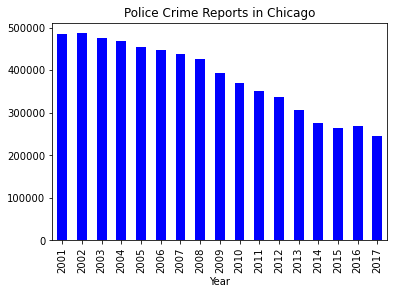

In [41]:
df1.plot.bar(color='b')
plt.title('Police Crime Reports in Chicago')

In [42]:
#g
df['FBI Code'].unique().shape[0]

26

In [43]:
fbi = pd.crosstab(df['Primary Type'],df['FBI Code'])
fbi.head()

FBI Code,01A,01B,02,03,04A,04B,05,06,07,08A,...,14,15,16,17,18,19,20,22,24,26
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
ASSAULT,0,0,0,0,101715,0,0,0,0,297526,...,0,0,0,0,0,0,0,0,0,0
BATTERY,0,0,0,0,0,171501,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BURGLARY,0,0,0,0,0,0,376773,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONCEALED CARRY LICENSE VIOLATION,0,0,0,0,0,0,0,0,0,0,...,0,148,0,0,0,0,0,0,0,0


In [44]:
fbi.idxmax().head()

FBI Code
01A               HOMICIDE
01B               HOMICIDE
02     CRIM SEXUAL ASSAULT
03                 ROBBERY
04A                ASSAULT
dtype: object

In [45]:
fbi.idxmax()['03']

'ROBBERY'

In [46]:
#h

h = pd.crosstab(df['FBI Code'],df['Year'])
h.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
FBI Code,,,,,,,,,,,,,,,,,
01A,667,656,601,453,451,471,448,513,460,438,436,504,421,424,493,777,621
01B,0,1,3,1,2,6,0,0,0,0,1,1,1,2,6,3,1
02,2154,2194,1967,1915,1878,1762,1830,1729,1607,1538,1631,1555,1395,1456,1510,1635,1571
03,18441,18522,17332,15978,16047,15968,15450,16703,15980,14273,13982,13485,11820,9799,9638,11960,10818
04A,7871,7721,7372,7331,6753,6597,6335,6250,6000,5277,5157,4873,4268,4337,4479,5709,5385


In [47]:
h.index = fbi.idxmax().values
h.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
HOMICIDE,667,656,601,453,451,471,448,513,460,438,436,504,421,424,493,777,621
HOMICIDE,0,1,3,1,2,6,0,0,0,0,1,1,1,2,6,3,1
CRIM SEXUAL ASSAULT,2154,2194,1967,1915,1878,1762,1830,1729,1607,1538,1631,1555,1395,1456,1510,1635,1571
ROBBERY,18441,18522,17332,15978,16047,15968,15450,16703,15980,14273,13982,13485,11820,9799,9638,11960,10818
ASSAULT,7871,7721,7372,7331,6753,6597,6335,6250,6000,5277,5157,4873,4268,4337,4479,5709,5385


In [48]:
crimes = h/h.sum()
crimes.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
HOMICIDE,0.001373,0.001348,0.001263,0.000965,0.000994,0.001051,0.001025,0.001201,0.001172,0.001183,0.001240,0.001501,0.001372,0.001543,0.001871,0.002897,0.002544
HOMICIDE,0.000000,0.000002,0.000006,0.000002,0.000004,0.000013,0.000000,0.000000,0.000000,0.000000,0.000003,0.000003,0.000003,0.000007,0.000023,0.000011,0.000004
CRIM SEXUAL ASSAULT,0.004435,0.004508,0.004133,0.004080,0.004139,0.003932,0.004188,0.004049,0.004093,0.004154,0.004638,0.004631,0.004546,0.005297,0.005730,0.006096,0.006437
ROBBERY,0.037965,0.038053,0.036418,0.034042,0.035370,0.035638,0.035357,0.039117,0.040703,0.038552,0.039760,0.040158,0.038520,0.035653,0.036575,0.044594,0.044323
ASSAULT,0.016204,0.015863,0.015490,0.015619,0.014885,0.014723,0.014498,0.014637,0.015283,0.014253,0.014665,0.014512,0.013909,0.015780,0.016997,0.021287,0.022063


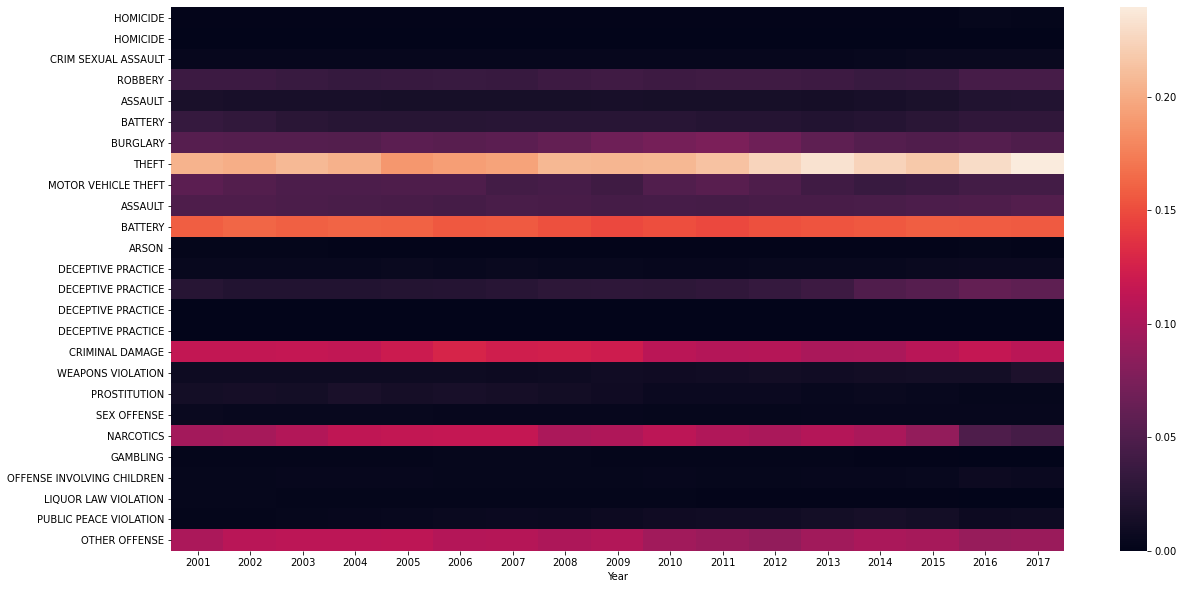

In [51]:
plt.subplots(figsize=(20,10))
sns.heatmap(crimes)

The appearance of theft is increasing, and the appearance of narcotics is decreasing. One  of the deceptive practive is increasing, and criminal damage, motor theft is decreasing. All others are tend to be constant.

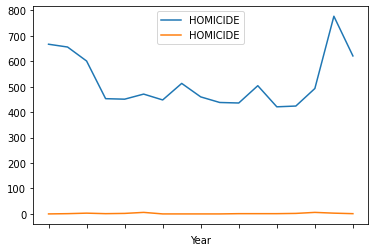

In [52]:
h.T.iloc[:,0:2].plot.line()